<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Функции</a></span><ul class="toc-item"><li><span><a href="#name_it" data-toc-modified-id="name_it-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>name_it</a></span></li><li><span><a href="#perc_nan" data-toc-modified-id="perc_nan-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>perc_nan</a></span></li><li><span><a href="#plt_hist" data-toc-modified-id="plt_hist-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>plt_hist</a></span></li><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>sMAPE</a></span></li></ul></li><li><span><a href="#Информация-о-данных" data-toc-modified-id="Информация-о-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Информация о данных</a></span></li><li><span><a href="#Расчёт-эффективности-обогащения" data-toc-modified-id="Расчёт-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Расчёт эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-в-тестовой-выборке-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Анализ признаков в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb)</a></span></li><li><span><a href="#Сравнение-размеров-гранул-сырья" data-toc-modified-id="Сравнение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение размеров гранул сырья</a></span></li><li><span><a href="#Концентрация-веществ-на-разных-стадиях" data-toc-modified-id="Концентрация-веществ-на-разных-стадиях-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Концентрация веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span><ul class="toc-item"><li><span><a href="#-Итоговый-комментарий" data-toc-modified-id="-Итоговый-комментарий-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span> Итоговый комментарий</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', 100)

### Функции

#### name_it

In [2]:
# Функция для именования графиков.
# Получает на вход: заголовок, подпись оси Х, подпись оси Y
# Ничего не возвращает
def name_it (title='', xlabel='', ylabel=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

#### perc_nan

In [3]:
# Напишем функцию с помощью которой оценим сколько строк пропущено
# и какой процент пропущенных строк в каждой из выборок
# На вход функция принимаем таблицу
# На экран функция выводит кол-во строк с пропусками
# и процент от общго кол-ва строк в выборке

def perc_nan(data):
    total = data.shape[0] - data.dropna().shape[0]
    perc = round(100 * (total / data.shape[0]))
    print(f'Всего строк с пропусками = {total}')
    print(f'Процент пропусков = {perc}%')

#### plt_hist

In [4]:
# Функция для построение гистограммы
def plt_hist(data, xa=None, alp=0.5, bns=10, leg=True):
    xa = data.hist(alpha=alp, bins=bns, ax=xa, legend=leg)
    return xa

#### sMAPE

In [5]:
# напишем функцию вычисления sMAPE
def sMAPE(target, predict):
    yi = target
    yai = predict
    res = (1 / target.shape[0]) * sum((abs(target - predict) / ((abs(target) + abs(predict)) / 2)))
    return res * 100

### Информация о данных

In [6]:
# Импортируем файлы
PATH = '/datasets/'
df_full = pd.read_csv(PATH + 'gold_recovery_full_new.csv', index_col='date')
df_test = pd.read_csv(PATH + 'gold_recovery_test_new.csv', index_col='date')
df_train = pd.read_csv(PATH + 'gold_recovery_train_new.csv', index_col='date')

In [7]:
# посмотрим размеры
display(df_full.shape, df_test.shape, df_train.shape)

(19439, 86)

(5290, 52)

(14149, 86)

In [8]:
# косвенно убедимся, что сумма обучающей и тестовой выборок равна полной
df_full.shape[0] - df_test.shape[0] - df_train.shape[0]

0

In [9]:
# посмотрим информацию о каждой из таблиц
df_full.info(), df_test.info(), df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

(None, None, None)

In [10]:
# так же посмотрим через дескрайб
display(df_full.describe(), df_test.describe(), df_train.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [11]:
# посмотрим есть ли пропуски и если есть, то сколько
perc_nan(df_train)

Всего строк с пропусками = 3132
Процент пропусков = 22%


In [12]:
perc_nan(df_test)

Всего строк с пропусками = 61
Процент пропусков = 1%


In [13]:
perc_nan(df_full)

Всего строк с пропусками = 3345
Процент пропусков = 17%


### Расчёт эффективности обогащения

Вычислим её на обучающей выборке для признака rougher.output.recovery.

Формула выглядит так:

![title](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [14]:
# Дополнительный столбец создавать не будем, потому возьмём новую переменную
df_train_emp = ((df_train['rougher.output.concentrate_au'] *
            (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))
                                           /
           (df_train['rougher.input.feed_au'] *
            (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))) * 100

In [15]:
# сравним результат расчёта с исходным столбцом
(abs(1 -
     (df_train_emp /
      df_train['rougher.output.recovery']))).describe()

count    1.385200e+04
mean     1.270601e-16
std      1.424040e-16
min      0.000000e+00
25%      0.000000e+00
50%      1.110223e-16
75%      2.220446e-16
max      1.998401e-15
dtype: float64

In [16]:
# Посчитаем МАЕ
print('MAE', mean_absolute_error(df_train['rougher.output.recovery'], df_train_emp))

MAE 9.73512347450521e-15


Средняя абсолютная ошибка оказалась очень маленькой, но всё таки не равной нулю, вероятно это разница сред в которых был проведен расчёт по формуле.

Формула работает.

В всех трёх таблицах имеются пропуски. В тестовой выборке пропусков совсем немного, их можно удалить. А вот в обучающей и полной пропусков довольно много, их прямое удаление может повлиять на результаты иследований. Возможно дальше ситуация с пропусками прояснится.

В тестовой выборке меньше столбцов по сравнению с обучающей и полной.

### Анализ признаков в тестовой выборке

In [17]:
# Посмотрим каких признаков не хватает в тестовой выборке, относительно обучающей
display(set(df_train.columns) - set(df_test.columns))
# и посчитаем их кол-во
len((set(df_train.columns) - set(df_test.columns)))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

34

In [18]:
# целевых признаков в выборке не оказалось
# пунктом выше мы убедились, что в тестовой выборке кол-во пропусков незначительное
# избавимся от них и выделим целевые признаки
df_test = df_test.dropna()
target_rougher_test = pd.Series(df_full['rougher.output.recovery'], index=df_test.index)
target_final_test = pd.Series(df_full['final.output.recovery'], index=df_test.index)

In [19]:
# пересобирём обучающую выборку без лишних признаков
ddd = df_train[df_test.columns].copy()
ddd['rougher.output.recovery'] = df_train['rougher.output.recovery']
ddd['final.output.recovery'] = df_train['final.output.recovery']
df_train = ddd.copy()

In [20]:
# проверим, что стало с пропусками
perc_nan(df_train)

Всего строк с пропусками = 1470
Процент пропусков = 10%


In [21]:
# 10% конечно на грани, но вполне допустимо у нас останется порядка 13000 строк
df_train = df_train.dropna()

В тестовом наборе нет признаков, относящихся к выходу веществ с флотации и последующих этапов очистки, нет расчитываемых характеристик веществ. Соответственно отсутствуют и целевые признаки.

Нас интересует выход ценных металлов, при этом стадиями можно считать:

поступление сырья -> черновой концентрат -> финальный концентрат

Соответственно признаками будут столбцы содержащие данные о поступающее сырье и данные поступающие на последующих этапах очистки, а целевым признаком эффективность очистки после флотации и финальный концентрат

In [22]:
# тут я не до конца определился, стоит ли удалять столбцы с состоянием
state_to_del = []
for col in ddd.columns:
    if 'state' in col:
        state_to_del.append(col)
        
# в итоге не стал
#ddd = ddd.drop(state_to_del, axis=1)

## Анализ данных

### Концентрация металлов (Au, Ag, Pb)

`[этап]`.`[тип_параметра]`.`[название_параметра]`


Возможные значения для блока `[этап]`:

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

<AxesSubplot:>

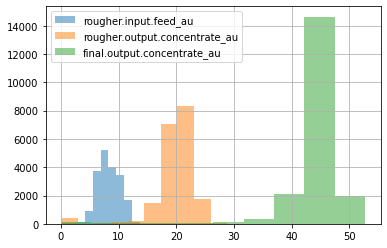

In [23]:
ax = plt_hist(df_full['rougher.input.feed_au'])
plt_hist(df_full['rougher.output.concentrate_au'], ax)
plt_hist(df_full['final.output.concentrate_au'], ax)

<AxesSubplot:>

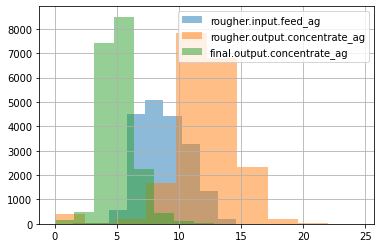

In [24]:
ax = plt_hist(df_full['rougher.input.feed_ag'])
plt_hist(df_full['rougher.output.concentrate_ag'], ax)
plt_hist(df_full['final.output.concentrate_ag'], ax)

<AxesSubplot:>

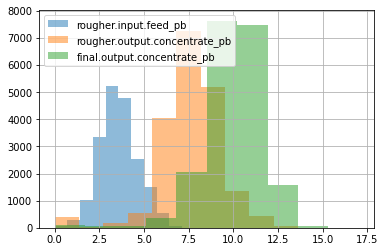

In [25]:
ax = plt_hist(df_full['rougher.input.feed_pb'])
plt_hist(df_full['rougher.output.concentrate_pb'], ax)
plt_hist(df_full['final.output.concentrate_pb'], ax)

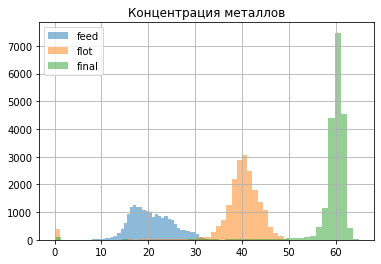

In [26]:
feed = (df_full['rougher.input.feed_au'] + 
df_full['rougher.input.feed_ag'] +
df_full['rougher.input.feed_pb']).to_frame('feed')

flot = (df_full['rougher.output.concentrate_au'] + 
df_full['rougher.output.concentrate_ag'] +
df_full['rougher.output.concentrate_pb']).to_frame('flot')

final = (df_full['final.output.concentrate_au'] + 
df_full['final.output.concentrate_ag'] +
df_full['final.output.concentrate_pb']).to_frame('final')

ax = plt_hist(feed, bns=50)
plt_hist(flot, ax, bns=50)
plt_hist(final, ax, bns=50)
name_it('Концентрация металлов')

In [27]:
# на всякий случай избавимся от нулевых концентраций в обучающей выборке
df_train = df_train[df_train['rougher.input.feed_au'] != 0]
df_train = df_train[df_train['rougher.input.feed_ag'] != 0]
df_train = df_train[df_train['rougher.input.feed_pb'] != 0]
#ddd = ddd[ddd['rougher.output.concentrate_au'] != 0]
#ddd = ddd[ddd['rougher.output.concentrate_ag'] != 0]
#ddd = ddd[ddd['rougher.output.concentrate_pb'] != 0]
#ddd = ddd[ddd['primary_cleaner.output.concentrate_au'] != 0]
#ddd = ddd[ddd['final.output.concentrate_au'] != 0]
#ddd = ddd[ddd['final.output.concentrate_ag'] != 0]
#ddd = ddd[ddd['final.output.concentrate_pb'] != 0]

In [28]:
df_train.shape

(12679, 54)

###  Сравнение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

In [29]:
display(df_train['rougher.input.feed_size'].describe(),
        df_test['rougher.input.feed_size'].describe())

count    12679.000000
mean        58.414412
std         20.441275
min          9.659576
25%         48.721041
50%         54.651129
75%         63.719220
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5229.000000
mean       55.863978
std        18.914656
min         0.046369
25%        43.911874
50%        50.772729
75%        62.265394
max       392.494040
Name: rougher.input.feed_size, dtype: float64

54.65112875525943
50.77272939330314


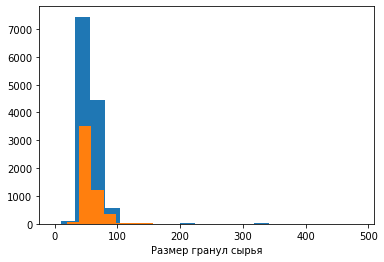

In [30]:
ax = df_train['rougher.input.feed_size'].plot.hist(bins=20)
df_test['rougher.input.feed_size'].plot.hist(bins=20, ax=ax)
name_it(xlabel='Размер гранул сырья')
print(df_train['rougher.input.feed_size'].median())
print(df_test['rougher.input.feed_size'].median())

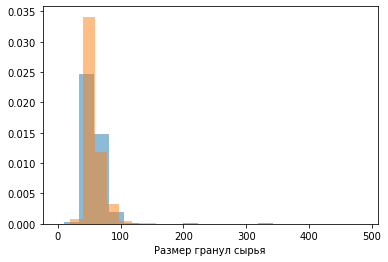

In [31]:
ax = df_train['rougher.input.feed_size'].plot.hist(bins=20, density=True, alpha=0.5)
df_test['rougher.input.feed_size'].plot.hist(bins=20, density=True, alpha=0.5, ax=ax)
name_it(xlabel='Размер гранул сырья')

In [32]:
# посмотрим в каких столбцах содержаться данные по металлам и посчитаем их кол-во
count = 0
for col in df_train.columns:
    if (('sol' in col) or ('ag' in col) or
        ('au' in col) or ('pb' in col)):
        count += 1
        print(count, col)

1 rougher.input.feed_ag
2 rougher.input.feed_pb
3 rougher.input.feed_sol
4 rougher.input.feed_au


### Концентрация веществ на разных стадиях

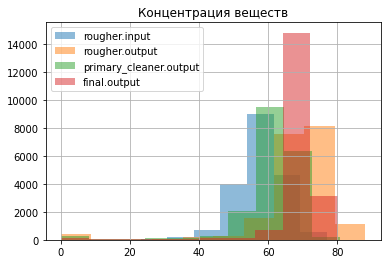

In [33]:
ax = (df_full['rougher.input.feed_ag'] +
 df_full['rougher.input.feed_au'] +
 df_full['rougher.input.feed_pb'] +
 df_full['rougher.input.feed_sol']).to_frame('rougher.input').hist(legend=True, alpha=0.5)

(df_full['rougher.output.concentrate_ag'] +
df_full['rougher.output.concentrate_au'] +
df_full['rougher.output.concentrate_pb'] +
df_full['rougher.output.concentrate_sol']).to_frame('rougher.output').hist(legend=True, ax=ax, alpha=0.5)

(df_full['primary_cleaner.output.concentrate_ag'] +
df_full['primary_cleaner.output.concentrate_au'] +
df_full['primary_cleaner.output.concentrate_pb'] +
df_full['primary_cleaner.output.concentrate_sol']).to_frame('primary_cleaner.output').hist(legend=True, ax=ax, alpha=0.5)

(df_full['final.output.concentrate_ag'] +
df_full['final.output.concentrate_au'] +
df_full['final.output.concentrate_pb'] +
df_full['final.output.concentrate_sol']).to_frame('final.output').hist(legend=True, ax=ax, alpha=0.5)
name_it('Концентрация веществ')

В данных оказались нулевые концентрации металлов и веществ на стадиях очистки. Такие данные вызывают подозрение, скорее всего это ошибки.

## Модель

Нужно спрогнозировать сразу две величины:

1. эффективность обогащения чернового концентрата `rougher.output.recovery`;
2. эффективность обогащения финального концентрата `final.output.recovery`.

In [34]:
# сделаем оценщик для кросс валидаци
my_scorer = make_scorer(sMAPE, greater_is_better=True)

In [35]:
# разделим обучающую выбоорку на признаци и целевые признаки
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']

In [36]:
# применим модель линейной регрессии к флотационному выходу
lr_r = LinearRegression()
lr_r.fit(features_train, target_rougher_train)
lr_scores_r = cross_val_score(lr_r, features_train, target_rougher_train, cv=5, scoring=my_scorer)
lr_scores_r

array([13.04491558,  8.23906154, 14.49494916, 10.83863211,  7.62785777])

In [37]:
# ... и к итоговому
lr_f = LinearRegression()
lr_f.fit(features_train, target_final_train)
lr_scores_f = cross_val_score(lr_f, features_train, target_final_train, cv=5, scoring=my_scorer)
lr_scores_f

array([12.10589552, 10.72437828, 10.91467604,  8.61175768, 12.44370194])

In [38]:
# посчитаем итоговый sMAPE для обучающей выборки
res_sMAPE = 0.25 * lr_scores_r + 0.75 * lr_scores_f
res_sMAPE.mean()

10.932332228426157

In [39]:
pred_test_r = lr_r.predict(df_test)
lr_scores_r = sMAPE(pred_test_r, target_rougher_test)
lr_scores_r

9.862356567615707

In [40]:
pred_test_f = lr_f.predict(df_test)
lr_scores_f = sMAPE(pred_test_f, target_final_test)
lr_scores_f

8.992691716166274

In [41]:
# посчитаем итоговый sMAPE для тестовой выборки
res_sMAPE_t = 0.25 * lr_scores_r + 0.75 * lr_scores_f
res_sMAPE_t

9.210107929028633

In [42]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import mean_squared_error

In [43]:
params = {'iterations': 200,
          'loss_function': 'RMSE'}
cv_dataset = Pool(data=features_train,  # задаём признаки
                  label=target_rougher_train) # задаём целевые признаки
scores = cv(cv_dataset,
            params,
            fold_count=5,
            verbose=False)

Training on fold [0/5]

bestTest = 8.880533118
bestIteration = 199

Training on fold [1/5]

bestTest = 9.210983125
bestIteration = 199

Training on fold [2/5]

bestTest = 9.688290337
bestIteration = 199

Training on fold [3/5]

bestTest = 8.176939854
bestIteration = 199

Training on fold [4/5]

bestTest = 10.2613624
bestIteration = 199



In [44]:
# наврядли будет другой результат и всё же:
params = {'iterations': 200,
          'loss_function': 'RMSE'}
cv_dataset = Pool(data=features_train,  # задаём признаки
                  label=target_final_train) # задаём целевые признаки
scores = cv(cv_dataset,
            params,
            fold_count=5,
            verbose=False)

Training on fold [0/5]

bestTest = 7.3648592
bestIteration = 199

Training on fold [1/5]

bestTest = 6.492533985
bestIteration = 199

Training on fold [2/5]

bestTest = 7.275422365
bestIteration = 199

Training on fold [3/5]

bestTest = 7.086386195
bestIteration = 199

Training on fold [4/5]

bestTest = 7.407256664
bestIteration = 199



In [45]:
cat_r = CatBoostRegressor(iterations=200, loss_function='RMSE')
cat_f = CatBoostRegressor(iterations=200, loss_function='RMSE')

In [46]:
%%time
cat_r.fit(features_train, target_rougher_train, verbose=False)

CPU times: user 3.31 s, sys: 17.7 ms, total: 3.32 s
Wall time: 4.37 s


In [47]:
cat_pred_r = cat_r.predict(features_train)
cat_scores_r = sMAPE(cat_pred_r, target_rougher_train)
display(f'sMAPE для предсказаний чернового концентрата = {round(cat_scores_r, 2)}')
cat_f.fit(features_train, target_final_train, verbose=False)
cat_pred_f = cat_f.predict(features_train)
cat_scores_f = sMAPE(cat_pred_f, target_final_train)
display(f'sMAPE для предсказаний итогового концентрата = {round(cat_scores_f, 2)}')

'sMAPE для предсказаний чернового концентрата = 6.1'

'sMAPE для предсказаний итогового концентрата = 4.88'

In [48]:
# посчитаем итоговый sMAPE для обучающей выборки
res_sMAPE = 0.25 * cat_scores_r + 0.75 * cat_scores_f
res_sMAPE
display(f'Итоговый sMAPE для обучающей выборки = {round(res_sMAPE, 2)}')

'Итоговый sMAPE для обучающей выборки = 5.18'

In [49]:
cat_pred_r = cat_r.predict(df_test)
cat_scores_r = sMAPE(cat_pred_r, target_rougher_test)
display(f'sMAPE для предсказаний чернового концентрата = {round(cat_scores_r, 2)}')
cat_pred_f = cat_f.predict(df_test)
cat_scores_f = sMAPE(cat_pred_f, target_final_test)
display(f'sMAPE для предсказаний итогового концентрата = {round(cat_scores_f, 2)}')

# посчитаем итоговый sMAPE для тестовой выборки
res_sMAPE = 0.25 * cat_scores_r + 0.75 * cat_scores_f
display(f'Итоговый sMAPE для тестовой выборки = {round(res_sMAPE, 2)}')

'sMAPE для предсказаний чернового концентрата = 10.28'

'sMAPE для предсказаний итогового концентрата = 9.26'

'Итоговый sMAPE для тестовой выборки = 9.52'

## Вывод

После обработки исходной таблицы, обработаны обучающая и тестовая выборки. Выделены признаки и целевые признаки. Обучены модели линейной регресии для двух целевых признаков:

* эффективность обогащения чернового концентрата `rougher.output.recovery`;
* эффективность обогащения финального концентрата `final.output.recovery`.

Получены значения симметричного среднего абсолютного процентного отклонения <b>sMAPE</b> для линейной регрессии:

* обогащения чернового концентрата `rougher.output.recovery` = 9.86
* обогащения финального концентрата `final.output.recovery` = 8.99
* итоговый sMAPE для тестовой выборки = 9.21


Получены значения <b>sMAPE</b> для модели градиентного бустинга `CatBoost`:

* обогащения чернового концентрата `rougher.output.recovery` = 10.28
* обогащения финального концентрата `final.output.recovery` = 9.26
* итоговый sMAPE для тестовой выборки = 9.52

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке